In [ ]:
import time
import random

# Function to generate random sensor values
def get_soil_moisture():
    return round(random.uniform(20, 80), 2)  # Moisture between 20% and 80%

def get_temperature():
    return round(random.uniform(15, 35), 2)  # Temperature between 15°C and 35°C

def get_humidity():
    return round(random.uniform(30, 90), 2)  # Humidity between 30% and 90%

# Simulate data every second
for i in range(10):  # Simulate for 10 cycles
    soil_moisture = get_soil_moisture()
    temperature = get_temperature()
    humidity = get_humidity()

    print(f"Cycle {i+1}:")
    print(f"  Soil Moisture: {soil_moisture}%")
    print(f"  Temperature: {temperature}°C")
    print(f"  Humidity: {humidity}%\n")

    time.sleep(1)  # Wait 1 second before next reading


Cycle 1:
  Soil Moisture: 79.63%
  Temperature: 24.76°C
  Humidity: 52.71%

Cycle 2:
  Soil Moisture: 30.91%
  Temperature: 31.65°C
  Humidity: 58.86%

Cycle 3:
  Soil Moisture: 38.03%
  Temperature: 19.81°C
  Humidity: 48.83%

Cycle 4:
  Soil Moisture: 56.51%
  Temperature: 21.17°C
  Humidity: 34.39%

Cycle 5:
  Soil Moisture: 56.63%
  Temperature: 15.63°C
  Humidity: 71.23%

Cycle 6:
  Soil Moisture: 72.96%
  Temperature: 30.27°C
  Humidity: 55.83%

Cycle 7:
  Soil Moisture: 44.52%
  Temperature: 24.93°C
  Humidity: 77.85%

Cycle 8:
  Soil Moisture: 31.04%
  Temperature: 31.24°C
  Humidity: 42.74%

Cycle 9:
  Soil Moisture: 64.99%
  Temperature: 18.36°C
  Humidity: 54.33%

Cycle 10:
  Soil Moisture: 71.74%
  Temperature: 28.19°C
  Humidity: 57.3%



Time: 0h - Soil Moisture: 59.80% | Temp: 25.00°C | Humidity: 75.00%
Time: 1h - Soil Moisture: 59.60% | Temp: 26.29°C | Humidity: 73.71%
Time: 2h - Soil Moisture: 59.40% | Temp: 27.50°C | Humidity: 72.50%
Time: 3h - Soil Moisture: 59.20% | Temp: 28.54°C | Humidity: 71.46%
Time: 4h - Soil Moisture: 59.00% | Temp: 29.33°C | Humidity: 70.67%
Time: 5h - Soil Moisture: 58.80% | Temp: 29.83°C | Humidity: 70.17%
Time: 6h - Soil Moisture: 58.60% | Temp: 30.00°C | Humidity: 70.00%
Time: 7h - Soil Moisture: 58.40% | Temp: 29.83°C | Humidity: 70.17%
Time: 8h - Soil Moisture: 58.20% | Temp: 29.33°C | Humidity: 70.67%
Time: 9h - Soil Moisture: 58.00% | Temp: 28.54°C | Humidity: 71.46%
Time: 10h - Soil Moisture: 57.80% | Temp: 27.50°C | Humidity: 72.50%
Time: 11h - Soil Moisture: 57.60% | Temp: 26.29°C | Humidity: 73.71%
Time: 12h - Soil Moisture: 57.40% | Temp: 25.00°C | Humidity: 75.00%
Time: 13h - Soil Moisture: 57.20% | Temp: 23.71°C | Humidity: 76.29%
Time: 14h - Soil Moisture: 57.00% | Temp: 22

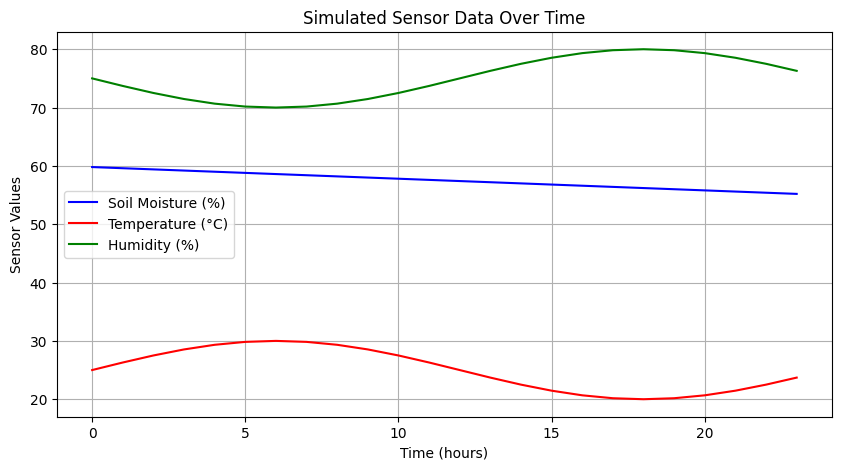

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Initialize variables
soil_moisture = 60  # Start with 60% moisture
temperature = 25  # Average temperature (°C)
humidity = 50  # Average humidity (%)
time_step = 1  # 1-second intervals
moisture_loss_rate = 0.2  # Moisture decreases over time (evaporation rate)
pump_on = False  # Pump status

# Lists to store values for plotting
moisture_values = []
temperature_values = []
humidity_values = []
time_values = []

# Function to simulate temperature variation using a sinusoidal pattern
def simulate_temperature(t):
    return 25 + 5 * np.sin(2 * np.pi * t / 24)  # Day-night temperature cycle

# Function to simulate humidity (inverse relation with temperature)
def simulate_humidity(temp):
    return 100 - temp  # Approximate inverse relationship

# Simulation loop
for t in range(24):  # Simulating for 24 cycles (24 seconds as a placeholder for hours)
    temperature = simulate_temperature(t)
    humidity = simulate_humidity(temperature)

    # Simulate soil moisture decreasing over time
    if not pump_on:
        soil_moisture -= moisture_loss_rate
    else:
        soil_moisture += 2  # Pump ON increases moisture

    # Ensure soil moisture stays within realistic bounds
    soil_moisture = max(10, min(soil_moisture, 100))

    # Store values for plotting
    time_values.append(t)
    moisture_values.append(soil_moisture)
    temperature_values.append(temperature)
    humidity_values.append(humidity)

    # Print values
    print(f"Time: {t}h - Soil Moisture: {soil_moisture:.2f}% | Temp: {temperature:.2f}°C | Humidity: {humidity:.2f}%")

    time.sleep(time_step)  # Wait 1 second (simulating real-time)

# Plot sensor data
plt.figure(figsize=(10, 5))
plt.plot(time_values, moisture_values, label="Soil Moisture (%)", color="blue")
plt.plot(time_values, temperature_values, label="Temperature (°C)", color="red")
plt.plot(time_values, humidity_values, label="Humidity (%)", color="green")
plt.xlabel("Time (hours)")
plt.ylabel("Sensor Values")
plt.title("Simulated Sensor Data Over Time")
plt.legend()
plt.grid()
plt.show()


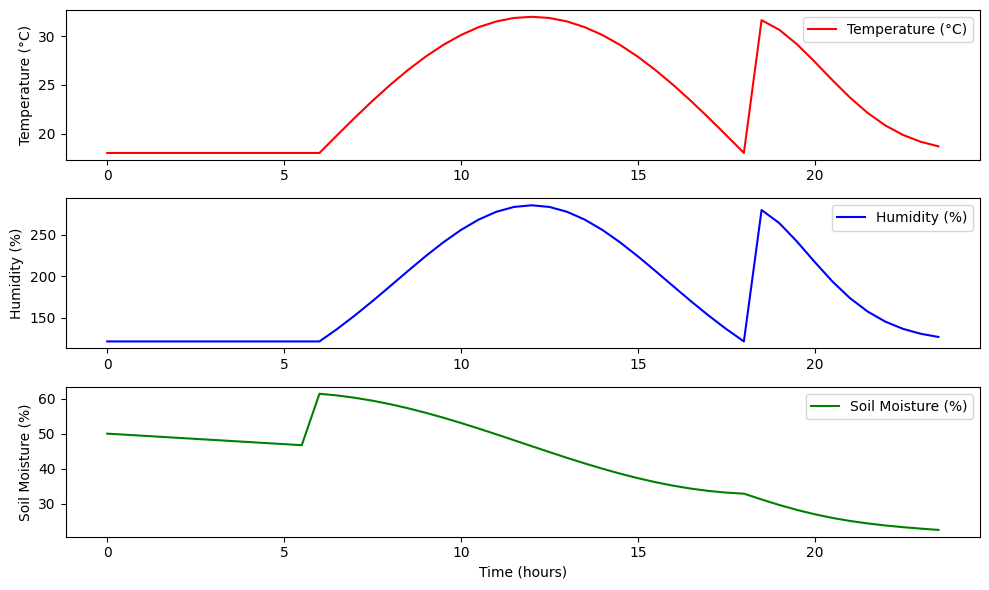

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def temperature_model(time, T_min=18, T_max=32, sunrise=6, sunset=18):
    """
    Simulates realistic temperature variations over 24 hours based on solar heating.
    """
    if time < sunrise or time > sunset:
        return T_min + (T_max - T_min) * np.exp(-(time - sunset) ** 2 / 10)  # Cooling at night
    else:
        return T_min + (T_max - T_min) * np.sin((np.pi * (time - sunrise)) / (sunset - sunrise))

def humidity_model(T, T_dew=15):
    """
    Simulates humidity variation based on Clausius-Clapeyron equation.
    """
    L_v = 2.5e6  # Latent heat of vaporization (J/kg)
    R_v = 461    # Specific gas constant for water vapor (J/kg*K)
    H_max = 100   # Max possible humidity (%)
    return H_max * np.exp(-L_v / R_v * (1 / (T + 273) - 1 / (T_dew + 273)))

def soil_moisture_model(prev_moisture, evap_rate, irrigation=False):
    """
    Simulates soil moisture based on Penman-Monteith equation (simplified).
    """
    irrigation_effect = 15 if irrigation else 0  # Sudden increase in moisture when irrigated
    return max(prev_moisture - evap_rate + irrigation_effect, 10)  # Ensuring minimum moisture

# Simulation parameters
time_steps = np.arange(0, 24, 0.5)  # Simulating every 30 minutes
T_values = np.array([temperature_model(t) for t in time_steps])
H_values = np.array([humidity_model(T) for T in T_values])

# Soil moisture simulation
soil_moisture = [50]  # Initial soil moisture level
for i in range(1, len(time_steps)):
    evap_rate = (T_values[i] - 15) * 0.1  # Higher temp = higher evaporation
    moisture = soil_moisture_model(soil_moisture[-1], evap_rate, irrigation=(time_steps[i] == 6))
    soil_moisture.append(moisture)

# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(time_steps, T_values, label='Temperature (°C)', color='red')
plt.ylabel("Temperature (°C)")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time_steps, H_values, label='Humidity (%)', color='blue')
plt.ylabel("Humidity (%)")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time_steps, soil_moisture, label='Soil Moisture (%)', color='green')
plt.ylabel("Soil Moisture (%)")
plt.xlabel("Time (hours)")
plt.legend()

plt.tight_layout()
plt.show()


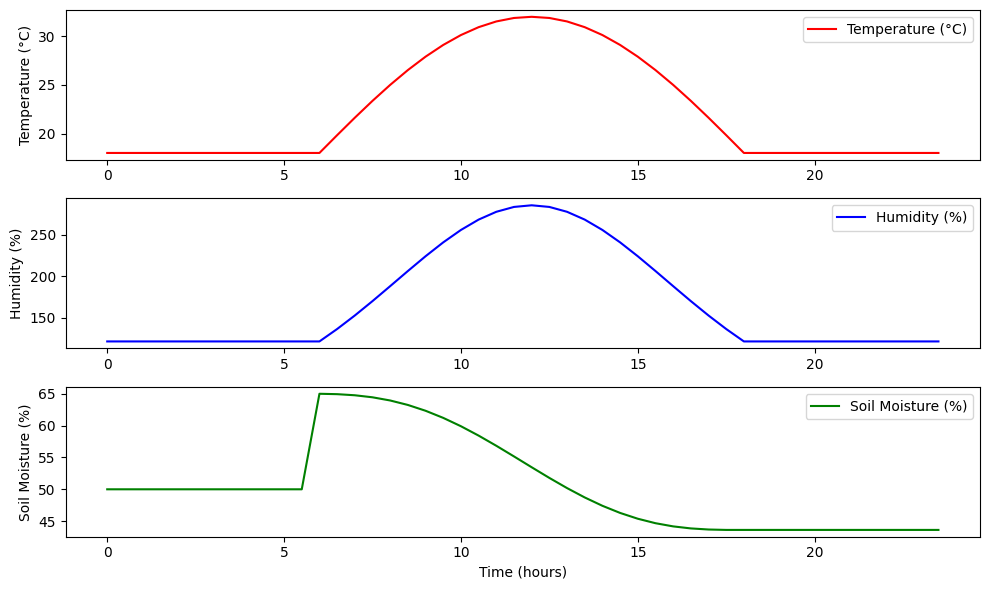

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Stefan_Boltzmann

def solar_radiation(time, sunrise=6, sunset=18):
    """Computes realistic solar radiation intensity based on time of day."""
    radiation = np.where((time >= sunrise) & (time <= sunset),
                         np.sin(np.pi * (time - sunrise) / (sunset - sunrise)),
                         0)
    return radiation

def temperature_model(time, T_min=18, T_max=32, sunrise=6, sunset=18):
    """Simulates temperature variations based on solar radiation."""
    return T_min + (T_max - T_min) * solar_radiation(time)

def humidity_model(T, T_dew=15):
    """Computes humidity using Clausius-Clapeyron equation."""
    L_v = 2.5e6  # Latent heat of vaporization (J/kg)
    R_v = 461    # Specific gas constant for water vapor (J/kg*K)
    H_max = 100  # Max possible humidity (%)
    return H_max * np.exp(-L_v / R_v * (1 / (T + 273) - 1 / (T_dew + 273)))

def soil_moisture_model(prev_moisture, evap_rate, irrigation=False):
    """Simulates soil moisture variation using evaporation and irrigation effects."""
    irrigation_effect = 15 if irrigation else 0
    return max(prev_moisture - evap_rate + irrigation_effect, 10)

# Simulation setup
time_steps = np.arange(0, 24, 0.5)
T_values = np.array([temperature_model(t) for t in time_steps])
H_values = np.array([humidity_model(T) for T in T_values])

# Soil moisture simulation with Penman-Monteith inspired evapotranspiration
evaporation_rates = 0.1 * (T_values - 15) * solar_radiation(time_steps)
soil_moisture = [50]
for i in range(1, len(time_steps)):
    moisture = soil_moisture_model(soil_moisture[-1], evaporation_rates[i], irrigation=(time_steps[i] == 6))
    soil_moisture.append(moisture)

# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(time_steps, T_values, label='Temperature (°C)', color='red')
plt.ylabel("Temperature (°C)")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time_steps, H_values, label='Humidity (%)', color='blue')
plt.ylabel("Humidity (%)")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time_steps, soil_moisture, label='Soil Moisture (%)', color='green')
plt.ylabel("Soil Moisture (%)")
plt.xlabel("Time (hours)")
plt.legend()

plt.tight_layout()
plt.show()


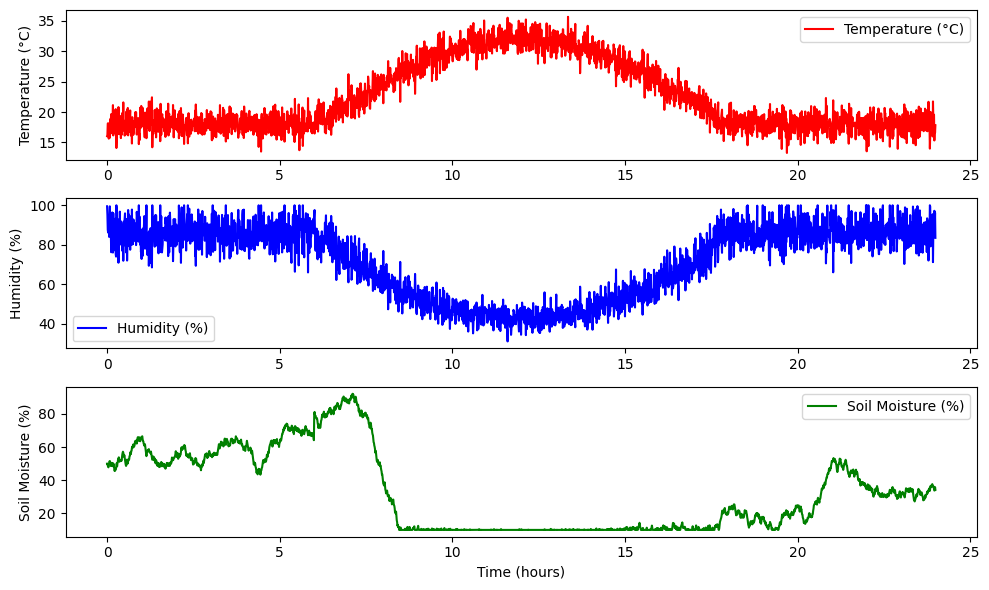

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def solar_radiation(time, sunrise=6, sunset=18):
    """Computes realistic solar radiation intensity based on time of day."""
    radiation = np.where((time >= sunrise) & (time <= sunset),
                         np.sin(np.pi * (time - sunrise) / (sunset - sunrise)),
                         0)
    return radiation

def temperature_model(time, T_min=18, T_max=32, sunrise=6, sunset=18):
    """Simulates temperature variations with daily cycles and noise."""
    base_temp = T_min + (T_max - T_min) * solar_radiation(time)
    noise = np.random.normal(0, 1.5, len(time))  # Adding sensor noise
    return base_temp + noise

def humidity_model(T, T_dew=15):
    """Computes humidity based on temperature with fluctuations."""
    H_max = 100  # Max possible humidity (%)
    humidity = H_max * np.exp(-0.05 * (T - T_dew))
    noise = np.random.uniform(-5, 5, len(T))  # Adding random fluctuations
    return np.clip(humidity + noise, 20, 100)  # Keep within realistic range

def soil_moisture_model(prev_moisture, evap_rate, irrigation=False):
    """Simulates soil moisture variation with evaporation and irrigation effects."""
    irrigation_effect = 15 if irrigation else 0
    noise = np.random.uniform(-2, 2)  # Small sensor variation
    return max(prev_moisture - evap_rate + irrigation_effect + noise, 10)

# Simulation setup
time_steps = np.arange(0, 24, 0.01)
T_values = temperature_model(time_steps)
H_values = humidity_model(T_values)

# Soil moisture simulation based on temperature effects
evaporation_rates = 0.1 * (T_values - 15) * solar_radiation(time_steps)
soil_moisture = [50]
for i in range(1, len(time_steps)):
    moisture = soil_moisture_model(soil_moisture[-1], evaporation_rates[i], irrigation=(time_steps[i] == 6))
    soil_moisture.append(moisture)

# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(time_steps, T_values, label='Temperature (°C)', color='red')
plt.ylabel("Temperature (°C)")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time_steps, H_values, label='Humidity (%)', color='blue')
plt.ylabel("Humidity (%)")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time_steps, soil_moisture, label='Soil Moisture (%)', color='green')
plt.ylabel("Soil Moisture (%)")
plt.xlabel("Time (hours)")
plt.legend()

plt.tight_layout()
plt.show()


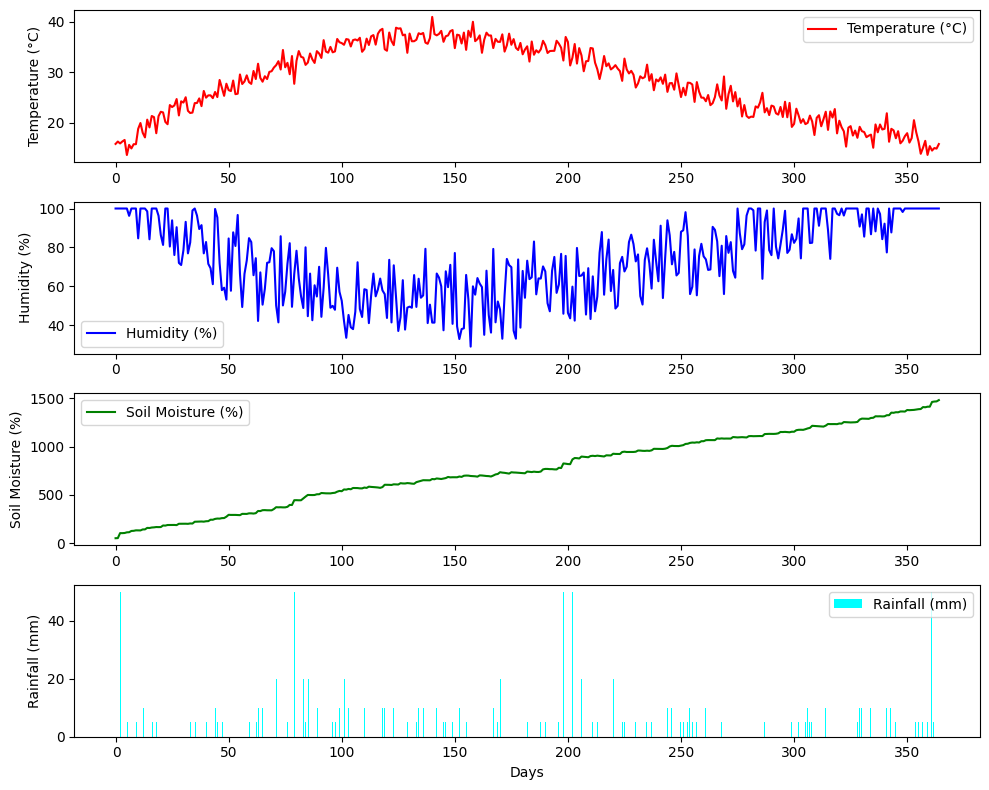

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
days = np.arange(0, 365, 1)  # Simulating for 30 days

# Solar radiation model (daily scale)
def solar_radiation(day):
    return np.sin(np.pi * (day % 365) / 365)  # Seasonal variation

# Temperature model with seasonal and daily variation
def temperature_model(day, T_min=15, T_max=35):
    seasonal_variation = 5 * np.sin(2 * np.pi * day / 365)  # Seasonal effect
    base_temp = T_min + (T_max - T_min) * solar_radiation(day) + seasonal_variation
    noise = np.random.normal(0, 1.5, len(day))  # Adding sensor noise
    return base_temp + noise

# Humidity model based on temperature and seasonal factors
def humidity_model(T):
    H_max = 100  # Max possible humidity (%)
    seasonal_humidity = np.random.uniform(50, 90, len(T))  # Seasonal variation
    humidity = H_max * np.exp(-0.05 * (T - 15)) + seasonal_humidity - 50
    noise = np.random.uniform(-5, 5, len(T))  # Adding random fluctuations
    return np.clip(humidity + noise, 20, 100)  # Keep within realistic range

# Event-based rainfall model (daily scale)
def rainfall_model(day):
    daily_rain_prob = 0.3  # 30% chance of rain per day
    rain_event = np.random.choice([0, 1], p=[1 - daily_rain_prob, daily_rain_prob], size=len(day))
    rain_amounts = np.random.choice([5, 10, 20, 50], p=[0.6, 0.25, 0.1, 0.05], size=len(day))
    return rain_event * rain_amounts  # Rainfall only occurs on selected days

# Soil moisture model incorporating evaporation and rainfall
def soil_moisture_model(prev_moisture, evap_rate, rainfall, irrigation=False):
    irrigation_effect = 15 if irrigation else 0
    noise = np.random.uniform(-2, 2)  # Small sensor variation
    return max(prev_moisture - evap_rate + rainfall + irrigation_effect + noise, 10)

# Generate daily data
T_values = temperature_model(days)
H_values = humidity_model(T_values)
Rain_values = rainfall_model(days)

# Soil moisture simulation
evaporation_rates = 0.1 * (T_values - 15) * solar_radiation(days)
soil_moisture = [50]
for i in range(1, len(days)):
    moisture = soil_moisture_model(soil_moisture[-1], evaporation_rates[i], Rain_values[i], irrigation=(i % 7 == 0))
    soil_moisture.append(moisture)

# Plot results
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(days, T_values, label='Temperature (°C)', color='red')
plt.ylabel("Temperature (°C)")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(days, H_values, label='Humidity (%)', color='blue')
plt.ylabel("Humidity (%)")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(days, soil_moisture, label='Soil Moisture (%)', color='green')
plt.ylabel("Soil Moisture (%)")
plt.legend()

plt.subplot(4, 1, 4)
plt.bar(days, Rain_values, label='Rainfall (mm)', color='cyan', width=0.4)
plt.ylabel("Rainfall (mm)")
plt.xlabel("Days")
plt.legend()

plt.tight_layout()
plt.show()


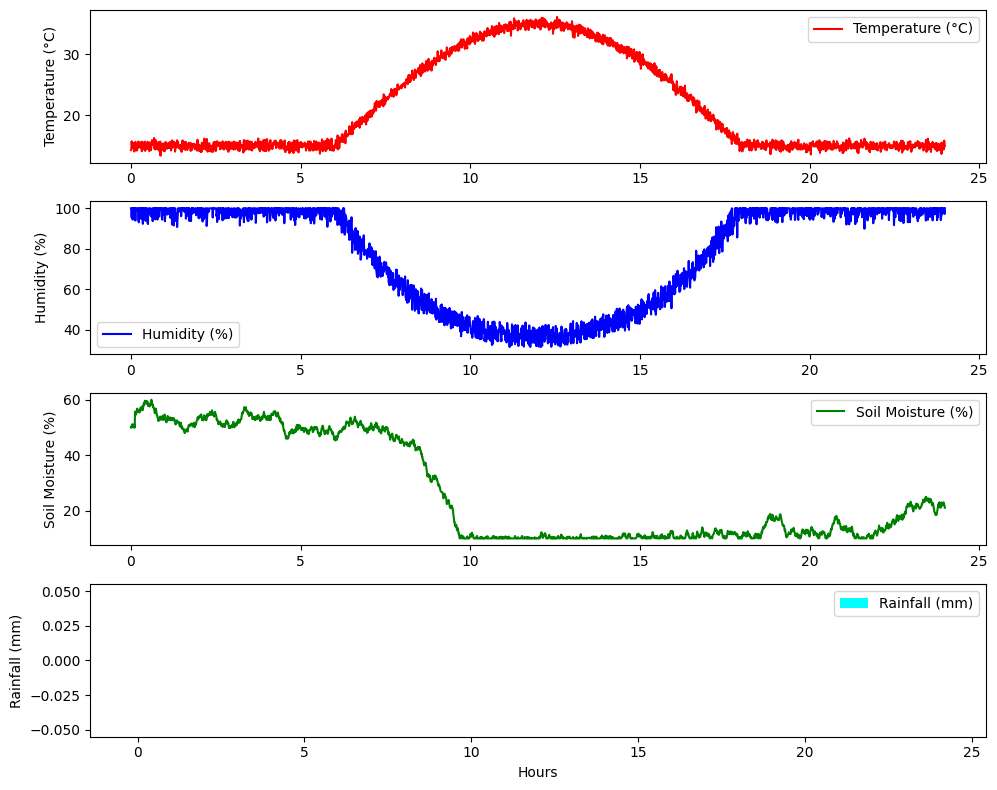

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
hours = np.arange(0, 24, 0.01)  # Simulating for 24 hours

# Solar radiation model (hourly scale)
# Solar radiation model (hourly scale) - Supports array input
def solar_radiation(hour, sunrise=6, sunset=18):
    radiation = np.where((sunrise <= hour) & (hour <= sunset),
                         np.sin(np.pi * (hour - sunrise) / (sunset - sunrise)),
                         0)
    return radiation


# Temperature model with daily variation
def temperature_model(hour, T_min=15, T_max=35):
    base_temp = T_min + (T_max - T_min) * solar_radiation(hour)
    noise = np.random.normal(0, 0.5, len(hour))  # Adding sensor noise
    return base_temp + noise

# Humidity model based on temperature and daily cycle
def humidity_model(T):
    H_max = 100  # Max possible humidity (%)
    humidity = H_max * np.exp(-0.05 * (T - 15))
    noise = np.random.uniform(-5, 5, len(T))  # Random fluctuations
    return np.clip(humidity + noise, 20, 100)  # Keep within realistic range

# Rainfall model (event-based, one-time occurrence in a day)
def rainfall_model(hour):
    rain_event_hour = np.random.choice(hour)  # Random hour for rainfall
    rain_amount = np.random.choice([0, 5, 10, 20], p=[0.8,0.1,0.07,0.03])
    return np.where(hours == rain_event_hour, rain_amount, 0)  # Rain at one hour only

# Soil moisture model incorporating evaporation and rainfall
def soil_moisture_model(prev_moisture, evap_rate, rainfall, irrigation=False):
    irrigation_effect = 5 if irrigation else 0  # Small irrigation impact
    noise = np.random.uniform(-1, 1)  # Small sensor variation
    return max(prev_moisture - evap_rate + rainfall + irrigation_effect + noise, 10)

# Generate hourly data
T_values = temperature_model(hours)
H_values = humidity_model(T_values)
Rain_values = rainfall_model(hours)

# Soil moisture simulation
evaporation_rates = 0.02 * (T_values - 15) * solar_radiation(hours)
soil_moisture = [50]
for i in range(1, len(hours)):
    moisture = soil_moisture_model(soil_moisture[-1], evaporation_rates[i], Rain_values[i], irrigation=(i == 12))
    soil_moisture.append(moisture)

# Plot results
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(hours, T_values, label='Temperature (°C)', color='red')
plt.ylabel("Temperature (°C)")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(hours, H_values, label='Humidity (%)', color='blue')
plt.ylabel("Humidity (%)")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(hours, soil_moisture, label='Soil Moisture (%)', color='green')
plt.ylabel("Soil Moisture (%)")
plt.legend()

plt.subplot(4, 1, 4)
plt.bar(hours, Rain_values, label='Rainfall (mm)', color='cyan', width=0.4)
plt.ylabel("Rainfall (mm)")
plt.xlabel("Hours")
plt.legend()

plt.tight_layout()
plt.show()


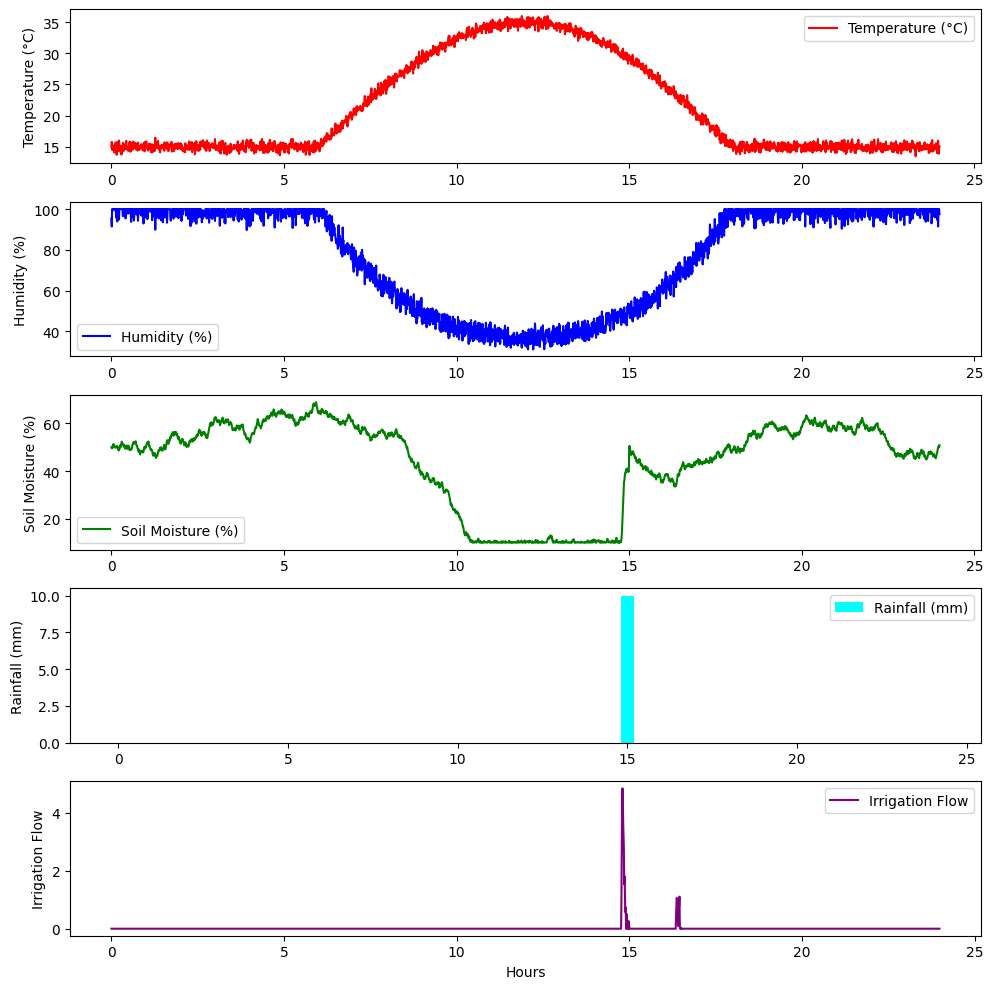

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
hours = np.arange(0, 24, 0.01)  # Simulating for 24 hours

# Solar radiation model (hourly scale) - Supports array input
def solar_radiation(hour, sunrise=6, sunset=18):
    radiation = np.where((sunrise <= hour) & (hour <= sunset),
                         np.sin(np.pi * (hour - sunrise) / (sunset - sunrise)),
                         0)
    return radiation

# Temperature model with daily variation
def temperature_model(hour, T_min=15, T_max=35):
    base_temp = T_min + (T_max - T_min) * solar_radiation(hour)
    noise = np.random.normal(0, 0.5, len(hour))  # Adding sensor noise
    return base_temp + noise

# Humidity model based on temperature and daily cycle
def humidity_model(T):
    H_max = 100  # Max possible humidity (%)
    humidity = H_max * np.exp(-0.05 * (T - 15))
    noise = np.random.uniform(-5, 5, len(T))  # Random fluctuations
    return np.clip(humidity + noise, 20, 100)  # Keep within realistic range

# Rainfall model (event-based, one-time occurrence in a day)
def rainfall_model(hour):
    rain_event_hour = np.random.choice(hours)  # Random hour for rainfall
    rain_amount = np.random.choice([0, 5, 10, 20], p=[0.8, 0.1, 0.07, 0.03])
    return np.where(hours == rain_event_hour, rain_amount, 0)  # Rain at one hour only

# PID Controller for irrigation
def pid_controller(setpoint, measured_value, prev_error, integral, Kp=0.5, Ki=0.1, Kd=0.05, dt=1):
    error = setpoint - measured_value
    integral += error * dt
    derivative = (error - prev_error) / dt
    output = Kp * error + Ki * integral + Kd * derivative
    return max(0, min(output, 10)), error, integral  # Clamp output between 0 and 10

# Soil moisture model incorporating evaporation, rainfall, and irrigation
def soil_moisture_model(prev_moisture, evap_rate, rainfall, irrigation):
    noise = np.random.uniform(-1, 1)  # Small sensor variation
    return max(prev_moisture - evap_rate + rainfall + irrigation + noise, 10)

# Generate hourly data
T_values = temperature_model(hours)
H_values = humidity_model(T_values)
Rain_values = rainfall_model(hours)

# Soil moisture simulation with PID irrigation control
setpoint_moisture = 40  # Desired soil moisture level
prev_error = 0
integral = 0
soil_moisture = [50]
irrigation_values = []
evaporation_rates = 0.02 * (T_values - 15) * solar_radiation(hours)

for i in range(1, len(hours)):
    irrigation, prev_error, integral = pid_controller(setpoint_moisture, soil_moisture[-1], prev_error, integral)
    moisture = soil_moisture_model(soil_moisture[-1], evaporation_rates[i], Rain_values[i], irrigation)
    soil_moisture.append(moisture)
    irrigation_values.append(irrigation)

# Plot results
plt.figure(figsize=(10, 10))
plt.subplot(5, 1, 1)
plt.plot(hours, T_values, label='Temperature (°C)', color='red')
plt.ylabel("Temperature (°C)")
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(hours, H_values, label='Humidity (%)', color='blue')
plt.ylabel("Humidity (%)")
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(hours, soil_moisture, label='Soil Moisture (%)', color='green')
plt.ylabel("Soil Moisture (%)")
plt.legend()

plt.subplot(5, 1, 4)
plt.bar(hours, Rain_values, label='Rainfall (mm)', color='cyan', width=0.4)
plt.ylabel("Rainfall (mm)")
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(hours[:-1], irrigation_values, label='Irrigation Flow', color='purple')
plt.ylabel("Irrigation Flow")
plt.xlabel("Hours")
plt.legend()

plt.tight_layout()
plt.show()


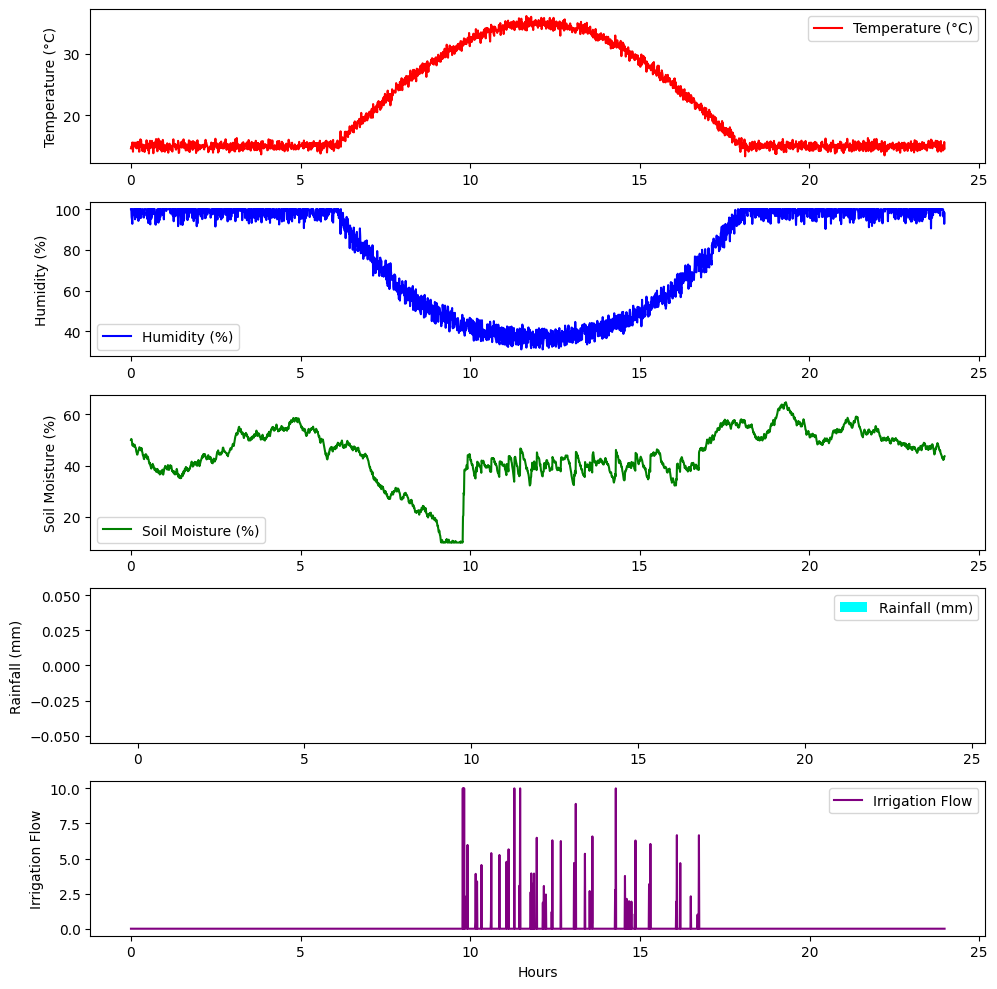

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
hours = np.arange(0, 24, 0.01)  # Simulating for 24 hours

# Solar radiation model (hourly scale) - Supports array input
def solar_radiation(hour, sunrise=6, sunset=18):
    radiation = np.where((sunrise <= hour) & (hour <= sunset),
                         np.sin(np.pi * (hour - sunrise) / (sunset - sunrise)),
                         0)
    return radiation

# Temperature model with daily variation
def temperature_model(hour, T_min=15, T_max=35):
    base_temp = T_min + (T_max - T_min) * solar_radiation(hour)
    noise = np.random.normal(0, 0.5, len(hour))  # Adding sensor noise
    return base_temp + noise

# Humidity model based on temperature and daily cycle
def humidity_model(T):
    H_max = 100  # Max possible humidity (%)
    humidity = H_max * np.exp(-0.05 * (T - 15))
    noise = np.random.uniform(-5, 5, len(T))  # Random fluctuations
    return np.clip(humidity + noise, 20, 100)  # Keep within realistic range

# Rainfall model (event-based, one-time occurrence in a day)
def rainfall_model(hour):
    rain_event_hour = np.random.choice(hours)  # Random hour for rainfall
    rain_amount = np.random.choice([0, 5, 10, 20], p=[0.8, 0.1, 0.07, 0.03])
    return np.where(hours == rain_event_hour, rain_amount, 0)  # Rain at one hour only

# Ziegler-Nichols PID tuning function
def ziegler_nichols_tuning(Ku, Pu):
    Kp = 0.6 * Ku
    Ki = 2 * Kp / Pu
    Kd = Kp * Pu / 8
    return Kp, Ki, Kd

# PID Controller for irrigation
def pid_controller(setpoint, measured_value, prev_error, integral, Kp, Ki, Kd, dt=1):
    error = setpoint - measured_value
    integral += error * dt
    derivative = (error - prev_error) / dt
    output = Kp * error + Ki * integral + Kd * derivative
    return max(0, min(output, 10)), error, integral  # Clamp output between 0 and 10

# Soil moisture model incorporating evaporation, rainfall, and irrigation
def soil_moisture_model(prev_moisture, evap_rate, rainfall, irrigation):
    noise = np.random.uniform(-1, 1)  # Small sensor variation
    return max(prev_moisture - evap_rate + rainfall + irrigation + noise, 10)

# Generate hourly data
T_values = temperature_model(hours)
H_values = humidity_model(T_values)
Rain_values = rainfall_model(hours)

# Initial PID parameters (manual trial before tuning)
Ku = 5  # Assume an initial ultimate gain
Pu = 6  # Assume an oscillation period
Kp, Ki, Kd = ziegler_nichols_tuning(Ku, Pu)

# Soil moisture simulation with PID irrigation control
setpoint_moisture = 40  # Desired soil moisture level
prev_error = 0
integral = 0
soil_moisture = [50]
irrigation_values = []
evaporation_rates = 0.02 * (T_values - 15) * solar_radiation(hours)

for i in range(1, len(hours)):
    irrigation, prev_error, integral = pid_controller(setpoint_moisture, soil_moisture[-1], prev_error, integral, Kp, Ki, Kd)
    moisture = soil_moisture_model(soil_moisture[-1], evaporation_rates[i], Rain_values[i], irrigation)
    soil_moisture.append(moisture)
    irrigation_values.append(irrigation)

# Plot results
plt.figure(figsize=(10, 10))
plt.subplot(5, 1, 1)
plt.plot(hours, T_values, label='Temperature (°C)', color='red')
plt.ylabel("Temperature (°C)")
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(hours, H_values, label='Humidity (%)', color='blue')
plt.ylabel("Humidity (%)")
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(hours, soil_moisture, label='Soil Moisture (%)', color='green')
plt.ylabel("Soil Moisture (%)")
plt.legend()

plt.subplot(5, 1, 4)
plt.bar(hours, Rain_values, label='Rainfall (mm)', color='cyan', width=0.4)
plt.ylabel("Rainfall (mm)")
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(hours[:-1], irrigation_values, label='Irrigation Flow', color='purple')
plt.ylabel("Irrigation Flow")
plt.xlabel("Hours")
plt.legend()

plt.tight_layout()
plt.show()


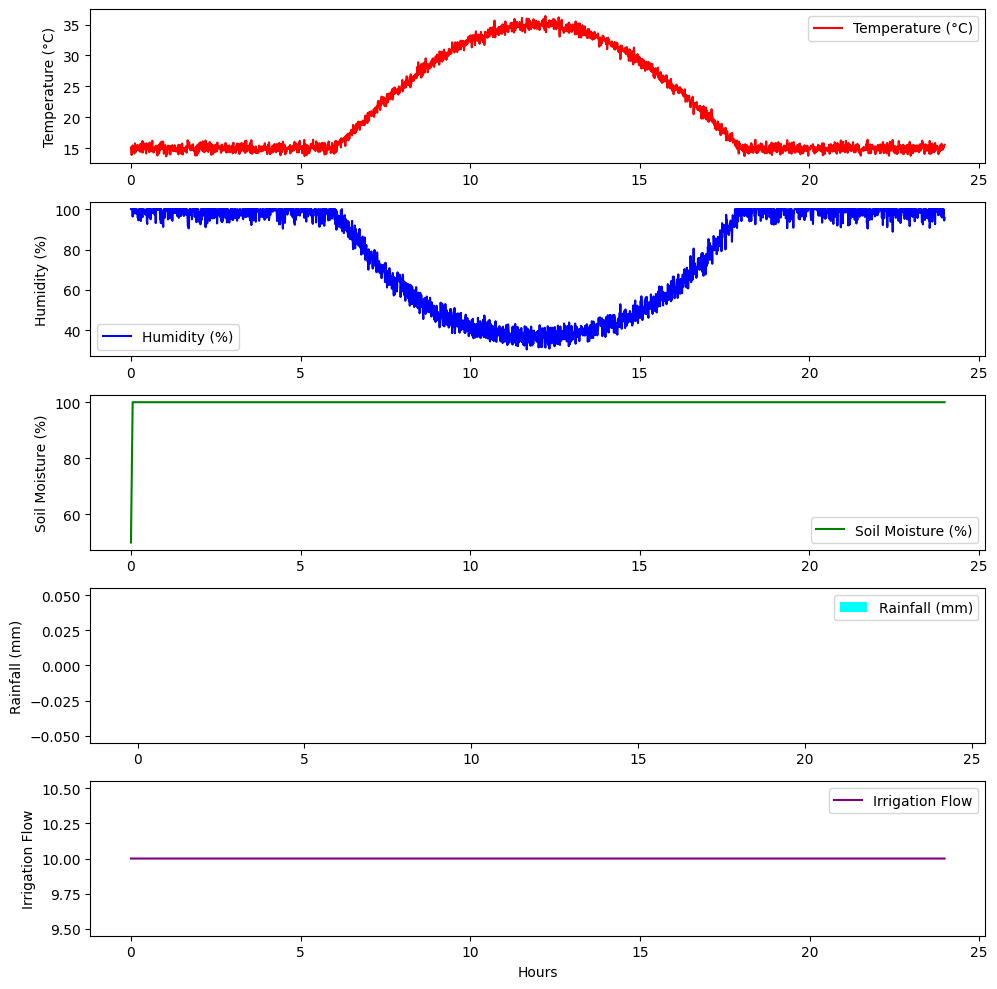

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
hours = np.arange(0, 24, 0.01)  # Simulating for 24 hours

# Solar radiation model (hourly scale) - Supports array input
def solar_radiation(hour, sunrise=6, sunset=18):
    radiation = np.where((sunrise <= hour) & (hour <= sunset),
                         np.sin(np.pi * (hour - sunrise) / (sunset - sunrise)),
                         0)
    return radiation

# Temperature model with daily variation
def temperature_model(hour, T_min=15, T_max=35):
    base_temp = T_min + (T_max - T_min) * solar_radiation(hour)
    noise = np.random.normal(0, 0.5, len(hour))  # Adding sensor noise
    return base_temp + noise

# Humidity model based on temperature and daily cycle
def humidity_model(T):
    H_max = 100  # Max possible humidity (%)
    humidity = H_max * np.exp(-0.05 * (T - 15))
    noise = np.random.uniform(-5, 5, len(T))  # Random fluctuations
    return np.clip(humidity + noise, 20, 100)  # Keep within realistic range

# Rainfall model (event-based, one-time occurrence in a day)
def rainfall_model(hour):
    rain_event_hour = np.random.choice(hours)  # Random hour for rainfall
    rain_amount = np.random.choice([0, 5, 10, 20], p=[0.8, 0.1, 0.07, 0.03])
    return np.where(hours == rain_event_hour, rain_amount, 0)  # Rain at one hour only

# PID Controller for irrigation
def pid_controller(setpoint, measured_value, prev_error, integral, Kp, Ki, Kd, dt=1):
    error = setpoint - measured_value
    integral = max(min(integral + error * dt, 50), -50)  # Anti-windup mechanism
    derivative = (error - prev_error) / dt
    output = Kp * error + Ki * integral + Kd * derivative
    return max(0, min(output, 10)), error, integral  # Clamp output between 0 and 10

# Soil moisture model incorporating evaporation, rainfall, and irrigation
def soil_moisture_model(prev_moisture, evap_rate, rainfall, irrigation):
    noise = np.random.uniform(-1, 1)  # Small sensor variation
    return np.clip(prev_moisture - evap_rate + rainfall + irrigation + noise, 0, 100)

# Generate hourly data
T_values = temperature_model(hours)
H_values = humidity_model(T_values)
Rain_values = rainfall_model(hours)

# Optimize PID parameters using Gradient Descent
def optimize_pid(Kp, Ki, Kd, alpha=0.001, iterations=100):
    setpoint_moisture = 40  # Desired soil moisture level
    for _ in range(iterations):
        prev_error = 0
        integral = 0
        soil_moisture = [50]
        total_error = 0
        for i in range(1, len(hours)):
            irrigation, prev_error, integral = pid_controller(setpoint_moisture, soil_moisture[-1], prev_error, integral, Kp, Ki, Kd)
            moisture = soil_moisture_model(soil_moisture[-1], 0.02 * (T_values[i] - 15) * solar_radiation(hours[i]), Rain_values[i], irrigation)
            soil_moisture.append(moisture)
            total_error += (setpoint_moisture - moisture) ** 2
        # Convert soil_moisture list to a NumPy array
        soil_moisture = np.array(soil_moisture)
        # Gradient descent update using derivatives
        grad_Kp = total_error / len(hours)
        grad_Ki = np.sum(np.abs(soil_moisture - setpoint_moisture)) / len(hours)
        grad_Kd = np.sum(np.abs(np.diff(soil_moisture))) / len(hours)
        Kp -= alpha * grad_Kp
        Ki -= alpha * grad_Ki
        Kd -= alpha * grad_Kd
    return Kp, Ki, Kd

# Optimize PID parameters
Kp, Ki, Kd = optimize_pid(0.6, 0.1, 0.05)

# Soil moisture simulation with optimized PID irrigation control
setpoint_moisture = 40  # Desired soil moisture level
prev_error = 0
integral = 0
soil_moisture = [50]
irrigation_values = []
evaporation_rates = 0.02 * (T_values - 15) * solar_radiation(hours)

for i in range(1, len(hours)):
    irrigation, prev_error, integral = pid_controller(setpoint_moisture, soil_moisture[-1], prev_error, integral, Kp, Ki, Kd)
    moisture = soil_moisture_model(soil_moisture[-1], evaporation_rates[i], Rain_values[i], irrigation)
    soil_moisture.append(moisture)
    irrigation_values.append(irrigation)

# Plot results
plt.figure(figsize=(10, 10))
plt.subplot(5, 1, 1)
plt.plot(hours, T_values, label='Temperature (°C)', color='red')
plt.ylabel("Temperature (°C)")
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(hours, H_values, label='Humidity (%)', color='blue')
plt.ylabel("Humidity (%)")
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(hours, soil_moisture, label='Soil Moisture (%)', color='green')
plt.ylabel("Soil Moisture (%)")
plt.legend()

plt.subplot(5, 1, 4)
plt.bar(hours, Rain_values, label='Rainfall (mm)', color='cyan', width=0.4)
plt.ylabel("Rainfall (mm)")
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(hours[:-1], irrigation_values, label='Irrigation Flow', color='purple')
plt.ylabel("Irrigation Flow")
plt.xlabel("Hours")
plt.legend()

plt.tight_layout()
plt.show()


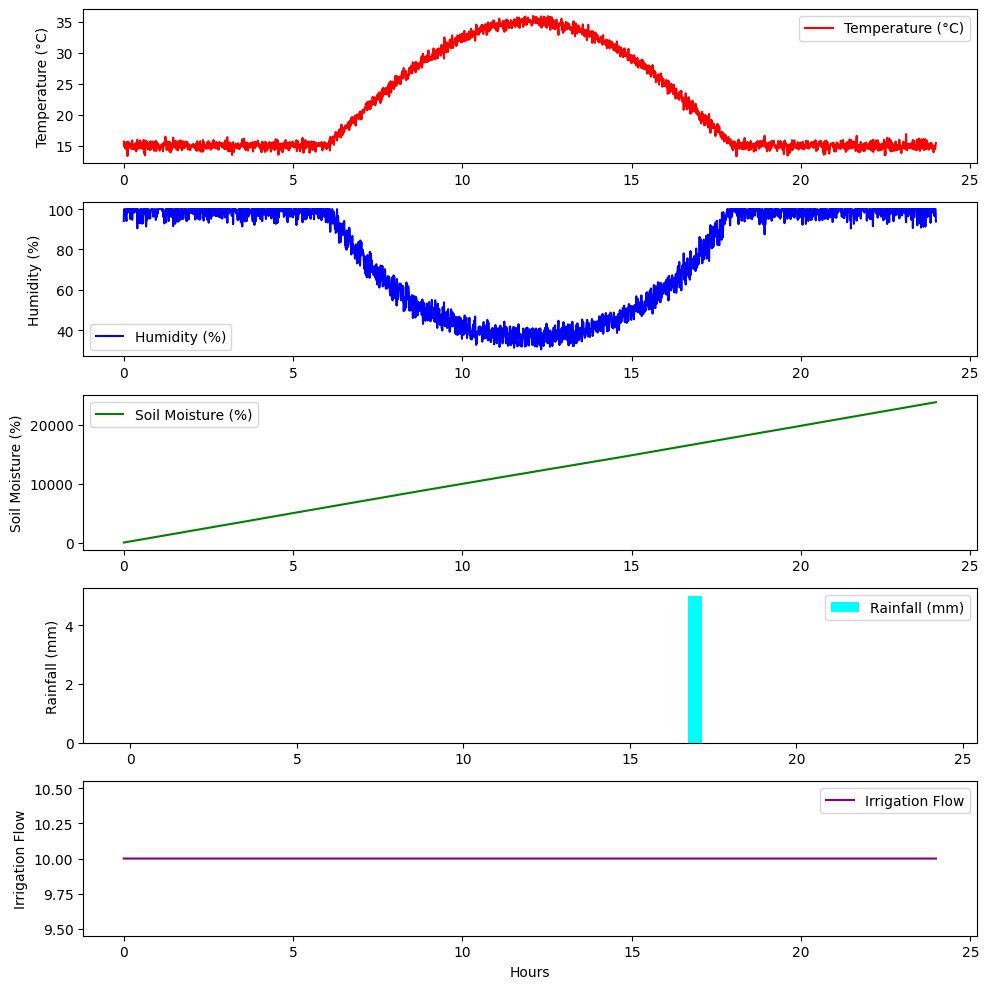

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
hours = np.arange(0, 24, 0.01)  # Simulating for 24 hours

# Solar radiation model (hourly scale) - Supports array input
def solar_radiation(hour, sunrise=6, sunset=18):
    radiation = np.where((sunrise <= hour) & (hour <= sunset),
                         np.sin(np.pi * (hour - sunrise) / (sunset - sunrise)),
                         0)
    return radiation

# Temperature model with daily variation
def temperature_model(hour, T_min=15, T_max=35):
    base_temp = T_min + (T_max - T_min) * solar_radiation(hour)
    noise = np.random.normal(0, 0.5, len(hour))  # Adding sensor noise
    return base_temp + noise

# Humidity model based on temperature and daily cycle
def humidity_model(T):
    H_max = 100  # Max possible humidity (%)
    humidity = H_max * np.exp(-0.05 * (T - 15))
    noise = np.random.uniform(-5, 5, len(T))  # Random fluctuations
    return np.clip(humidity + noise, 20, 100)  # Keep within realistic range

# Rainfall model (event-based, one-time occurrence in a day)
def rainfall_model(hour):
    rain_event_hour = np.random.choice(hours)  # Random hour for rainfall
    rain_amount = np.random.choice([0, 5, 10, 20], p=[0.8, 0.1, 0.07, 0.03])
    return np.where(hours == rain_event_hour, rain_amount, 0)  # Rain at one hour only

# PID Controller for irrigation
def pid_controller(setpoint, measured_value, prev_error, integral, Kp, Ki, Kd, dt=1):
    error = setpoint - measured_value
    integral = max(min(integral + error * dt, 50), -50)  # Anti-windup mechanism
    derivative = (error - prev_error) / dt
    output = Kp * error + Ki * integral + Kd * derivative
    return max(0, min(output, 10)), error, integral  # Clamp output between 0 and 10

# Soil moisture model incorporating evaporation, rainfall, and irrigation
def soil_moisture_model(prev_moisture, evap_rate, rainfall, irrigation):
    noise = np.random.uniform(-1, 1)  # Small sensor variation
    return max(prev_moisture - evap_rate + rainfall + irrigation + noise, 10)

# Generate hourly data
T_values = temperature_model(hours)
H_values = humidity_model(T_values)
Rain_values = rainfall_model(hours)

# Optimize PID parameters using Gradient Descent
def optimize_pid(Kp, Ki, Kd, alpha=0.01, iterations=100):
    setpoint_moisture = 40  # Desired soil moisture level
    for _ in range(iterations):
        prev_error = 0
        integral = 0
        soil_moisture = [50]
        total_error = 0
        for i in range(1, len(hours)):
            irrigation, prev_error, integral = pid_controller(setpoint_moisture, soil_moisture[-1], prev_error, integral, Kp, Ki, Kd)
            moisture = soil_moisture_model(soil_moisture[-1], 0.02 * (T_values[i] - 15) * solar_radiation(hours[i]), Rain_values[i], irrigation)
            soil_moisture.append(moisture)
            total_error += abs(setpoint_moisture - moisture)
        # Convert soil_moisture list to a NumPy array
        soil_moisture = np.array(soil_moisture)
        # Gradient descent update using derivatives
        grad_Kp = total_error / len(hours)
        grad_Ki = np.sum(np.abs(soil_moisture - setpoint_moisture)) / len(hours)
        grad_Kd = np.sum(np.diff(soil_moisture)) / len(hours)
        Kp -= alpha * grad_Kp
        Ki -= alpha * grad_Ki
        Kd -= alpha * grad_Kd
    return Kp, Ki, Kd

# Optimize PID parameters
Kp, Ki, Kd = optimize_pid(0.6, 0.1, 0.05)

# Soil moisture simulation with optimized PID irrigation control
setpoint_moisture = 40  # Desired soil moisture level
prev_error = 0
integral = 0
soil_moisture = [50]
irrigation_values = []
evaporation_rates = 0.02 * (T_values - 15) * solar_radiation(hours)

for i in range(1, len(hours)):
    irrigation, prev_error, integral = pid_controller(setpoint_moisture, soil_moisture[-1], prev_error, integral, Kp, Ki, Kd)
    moisture = soil_moisture_model(soil_moisture[-1], evaporation_rates[i], Rain_values[i], irrigation)
    soil_moisture.append(moisture)
    irrigation_values.append(irrigation)

# Plot results
plt.figure(figsize=(10, 10))
plt.subplot(5, 1, 1)
plt.plot(hours, T_values, label='Temperature (°C)', color='red')
plt.ylabel("Temperature (°C)")
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(hours, H_values, label='Humidity (%)', color='blue')
plt.ylabel("Humidity (%)")
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(hours, soil_moisture, label='Soil Moisture (%)', color='green')
plt.ylabel("Soil Moisture (%)")
plt.legend()

plt.subplot(5, 1, 4)
plt.bar(hours, Rain_values, label='Rainfall (mm)', color='cyan', width=0.4)
plt.ylabel("Rainfall (mm)")
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(hours[:-1], irrigation_values, label='Irrigation Flow', color='purple')
plt.ylabel("Irrigation Flow")
plt.xlabel("Hours")
plt.legend()

plt.tight_layout()
plt.show()


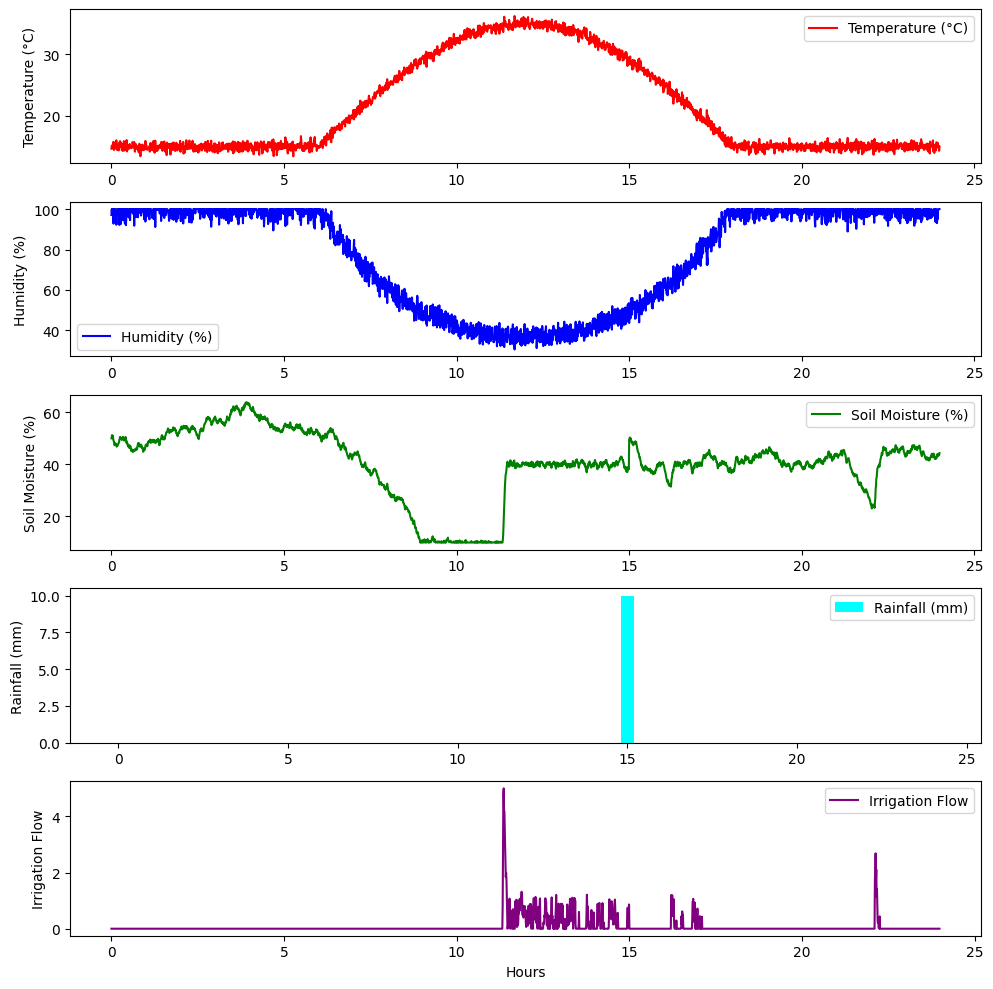

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
hours = np.arange(0, 24, 0.01)  # Simulating for 24 hours

# Solar radiation model (hourly scale) - Supports array input
def solar_radiation(hour, sunrise=6, sunset=18):
    radiation = np.where((sunrise <= hour) & (hour <= sunset),
                         np.sin(np.pi * (hour - sunrise) / (sunset - sunrise)),
                         0)
    return radiation

# Temperature model with daily variation
def temperature_model(hour, T_min=15, T_max=35):
    base_temp = T_min + (T_max - T_min) * solar_radiation(hour)
    noise = np.random.normal(0, 0.5, len(hour))  # Adding sensor noise
    return base_temp + noise

# Humidity model based on temperature and daily cycle
def humidity_model(T):
    H_max = 100  # Max possible humidity (%)
    humidity = H_max * np.exp(-0.05 * (T - 15))
    noise = np.random.uniform(-5, 5, len(T))  # Random fluctuations
    return np.clip(humidity + noise, 20, 100)  # Keep within realistic range

# Rainfall model (event-based, one-time occurrence in a day)
def rainfall_model(hour):
    rain_event_hour = 15 #np.random.choice(hours)  # Random hour for rainfall
    rain_amount = 10 #np.random.choice([0, 5, 10, 20], p=[0.8, 0.1, 0.07, 0.03])
    return np.where(hours == rain_event_hour, rain_amount, 0)  # Rain at one hour only

# PID Controller for irrigation
def pid_controller(setpoint, measured_value, prev_error, integral, Kp=0.5, Ki=0.1, Kd=0.05, dt=1):
    error = setpoint - measured_value
    integral += error * dt
    derivative = (error - prev_error) / dt
    output = Kp * error + Ki * integral + Kd * derivative
    return max(0, min(output, 10)), error, integral  # Clamp output between 0 and 10

# Soil moisture model incorporating evaporation, rainfall, and irrigation
def soil_moisture_model(prev_moisture, evap_rate, rainfall, irrigation):
    noise = np.random.uniform(-1, 1)  # Small sensor variation
    return max(prev_moisture - evap_rate + rainfall + irrigation + noise, 10)

# Generate hourly data
T_values = temperature_model(hours)
H_values = humidity_model(T_values)
Rain_values = rainfall_model(hours)

# Soil moisture simulation with PID irrigation control
setpoint_moisture = 40  # Desired soil moisture level
prev_error = 0
integral = 0
soil_moisture = [50]
irrigation_values = []
evaporation_rates = 0.02 * (T_values - 15) * solar_radiation(hours)

for i in range(1, len(hours)):
    irrigation, prev_error, integral = pid_controller(setpoint_moisture, soil_moisture[-1], prev_error, integral)
    moisture = soil_moisture_model(soil_moisture[-1], evaporation_rates[i], Rain_values[i], irrigation)
    soil_moisture.append(moisture)
    irrigation_values.append(irrigation)

# Plot results
plt.figure(figsize=(10, 10))
plt.subplot(5, 1, 1)
plt.plot(hours, T_values, label='Temperature (°C)', color='red')
plt.ylabel("Temperature (°C)")
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(hours, H_values, label='Humidity (%)', color='blue')
plt.ylabel("Humidity (%)")
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(hours, soil_moisture, label='Soil Moisture (%)', color='green')
plt.ylabel("Soil Moisture (%)")
plt.legend()

plt.subplot(5, 1, 4)
plt.bar(hours, Rain_values, label='Rainfall (mm)', color='cyan', width=0.4)
plt.ylabel("Rainfall (mm)")
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(hours[:-1], irrigation_values, label='Irrigation Flow', color='purple')
plt.ylabel("Irrigation Flow")
plt.xlabel("Hours")
plt.legend()

plt.tight_layout()
plt.show()



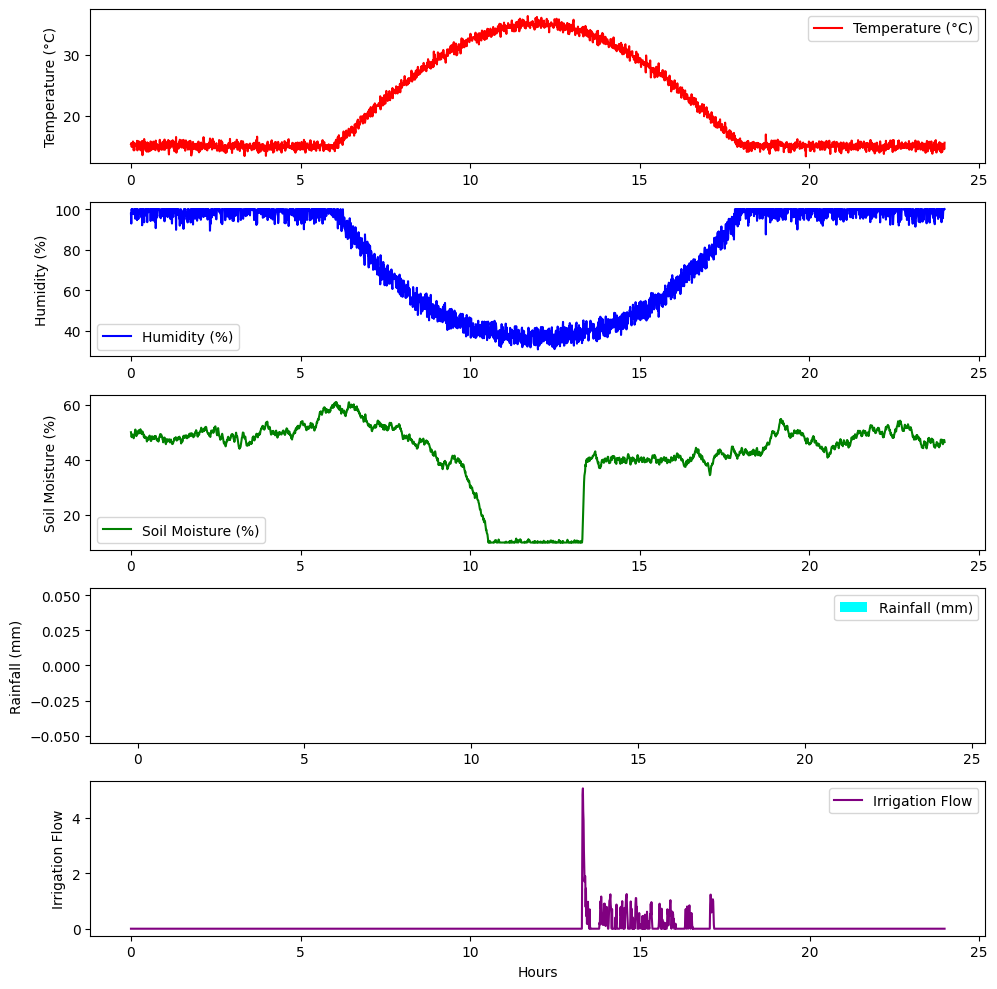

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
hours = np.arange(0, 24, 0.01)  # Simulating for 24 hours

# Solar radiation model (hourly scale) - Supports array input
def solar_radiation(hour, sunrise=6, sunset=18):
    radiation = np.where((sunrise <= hour) & (hour <= sunset),
                         np.sin(np.pi * (hour - sunrise) / (sunset - sunrise)),
                         0)
    return radiation

# Temperature model with daily variation
def temperature_model(hour, T_min=15, T_max=35):
    base_temp = T_min + (T_max - T_min) * solar_radiation(hour)
    noise = np.random.normal(0, 0.5, len(hour))  # Adding sensor noise
    return base_temp + noise

# Humidity model based on temperature and daily cycle
def humidity_model(T):
    H_max = 100  # Max possible humidity (%)
    humidity = H_max * np.exp(-0.05 * (T - 15))
    noise = np.random.uniform(-5, 5, len(T))  # Random fluctuations
    return np.clip(humidity + noise, 20, 100)  # Keep within realistic range

# Rainfall model (event-based, one-time occurrence in a day)
def rainfall_model(hour):
    rain_event_hour = np.random.choice(hours)  # Random hour for rainfall
    rain_amount = np.random.choice([0, 5, 10, 20], p=[0.8, 0.1, 0.07, 0.03])
    return np.where(hours == rain_event_hour, rain_amount, 0)  # Rain at one hour only

# PID Controller for irrigation
def pid_controller(setpoint, measured_value, prev_error, integral, Kp=0.5, Ki=0.1, Kd=0.05, dt=1):
    error = setpoint - measured_value
    integral += error * dt
    derivative = (error - prev_error) / dt
    output = Kp * error + Ki * integral + Kd * derivative
    return max(0, min(output, 10)), error, integral  # Clamp output between 0 and 10

# Soil moisture model incorporating evaporation, rainfall, and irrigation
def soil_moisture_model(prev_moisture, evap_rate, rainfall, irrigation):
    noise = np.random.uniform(-1, 1)  # Small sensor variation
    return max(prev_moisture - evap_rate + rainfall + irrigation + noise, 10)

# Generate hourly data
T_values = temperature_model(hours)
H_values = humidity_model(T_values)
Rain_values = rainfall_model(hours)

# Soil moisture simulation with PID irrigation control
setpoint_moisture = 40  # Desired soil moisture level
prev_error = 10
integral = 0
soil_moisture = [50]
irrigation_values = []
evaporation_rates = 0.02 * (T_values - 15) * solar_radiation(hours)

for i in range(1, len(hours)):
    irrigation, prev_error, integral = pid_controller(setpoint_moisture, soil_moisture[-1], prev_error, integral)
    moisture = soil_moisture_model(soil_moisture[-1], evaporation_rates[i], Rain_values[i], irrigation)
    soil_moisture.append(moisture)
    irrigation_values.append(irrigation)

# Plot results
plt.figure(figsize=(10, 10))
plt.subplot(5, 1, 1)
plt.plot(hours, T_values, label='Temperature (°C)', color='red')
plt.ylabel("Temperature (°C)")
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(hours, H_values, label='Humidity (%)', color='blue')
plt.ylabel("Humidity (%)")
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(hours, soil_moisture, label='Soil Moisture (%)', color='green')
plt.ylabel("Soil Moisture (%)")
plt.legend()

plt.subplot(5, 1, 4)
plt.bar(hours, Rain_values, label='Rainfall (mm)', color='cyan', width=0.4)
plt.ylabel("Rainfall (mm)")
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(hours[:-1], irrigation_values, label='Irrigation Flow', color='purple')
plt.ylabel("Irrigation Flow")
plt.xlabel("Hours")
plt.legend()

plt.tight_layout()
plt.show()


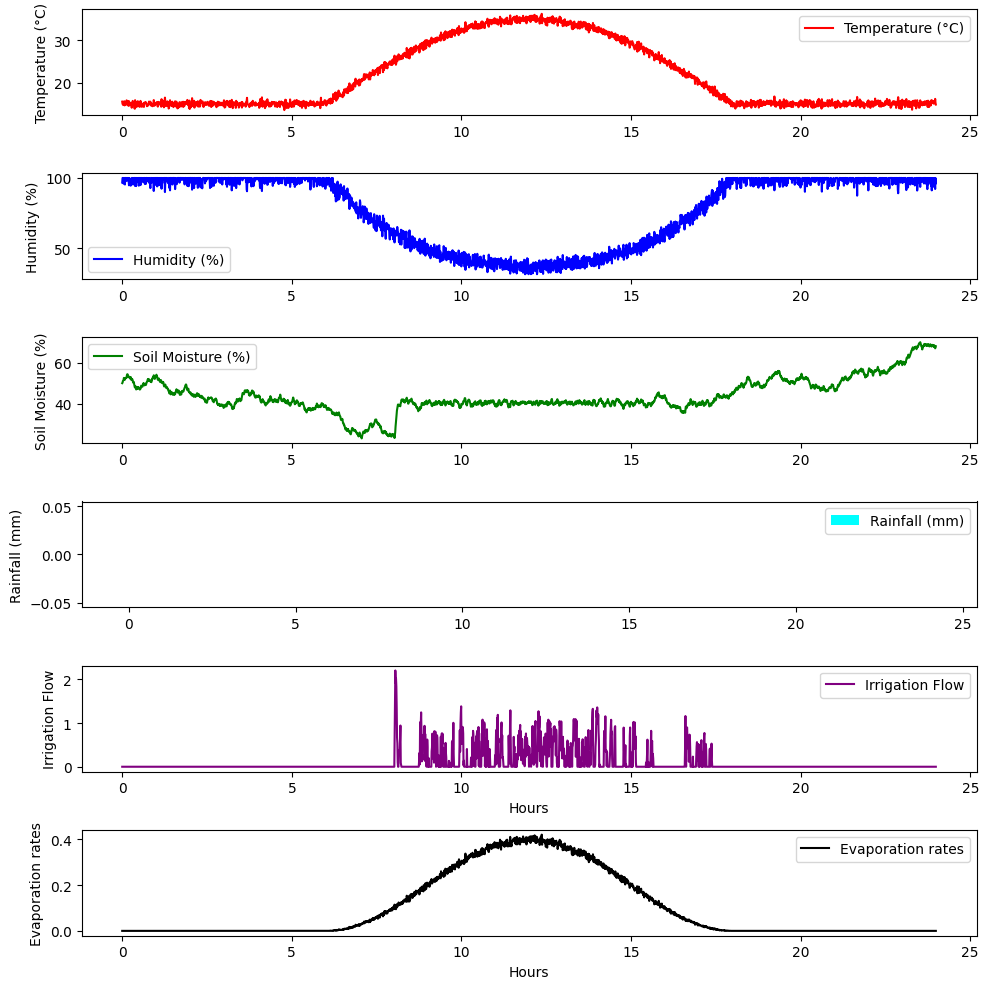

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
hours = np.arange(0, 24, 0.01)  # Simulating for 24 hours

# Solar radiation model (hourly scale) - Supports array input
def solar_radiation(hour, sunrise=6, sunset=18):
    radiation = np.where((sunrise <= hour) & (hour <= sunset),
                         np.sin(np.pi * (hour - sunrise) / (sunset - sunrise)),
                         0)
    return radiation

# Temperature model with daily variation
def temperature_model(hour, T_min=15, T_max=35):
    base_temp = T_min + (T_max - T_min) * solar_radiation(hour)
    noise = np.random.normal(0, 0.5, len(hour))  # Adding sensor noise
    return base_temp + noise

# Humidity model based on temperature and daily cycle
def humidity_model(T):
    H_max = 100  # Max possible humidity (%)
    humidity = H_max * np.exp(-0.05 * (T - 15))
    noise = np.random.uniform(-5, 5, len(T))  # Random fluctuations
    return np.clip(humidity + noise, 20, 100)  # Keep within realistic range

# Rainfall model (event-based, one-time occurrence in a day)
def rainfall_model(hour):
    rain_event_hour = np.random.choice(hours)  # Random hour for rainfall
    rain_amount = np.random.choice([0, 5, 10, 20], p=[0.8, 0.1, 0.07, 0.03])
    return np.where(hours == rain_event_hour, rain_amount, 0)  # Rain at one hour only

# PID Controller for irrigation
def pid_controller(setpoint, measured_value, evap_rate, prev_error, integral, Kp=0.5, Ki=0.1, Kd=0.05, dt=1):
    error = setpoint - (measured_value - evap_rate)  # Adjusting for evaporation
    integral += error * dt
    derivative = (error - prev_error) / dt
    output = Kp * error + Ki * integral + Kd * derivative
    return max(0, min(output, 10)), error, integral  # Clamp output between 0 and 10

# Soil moisture model incorporating evaporation, rainfall, and irrigation
def soil_moisture_model(prev_moisture, evap_rate, rainfall, irrigation):
    noise = np.random.uniform(-1, 1)  # Small sensor variation
    return max(prev_moisture - evap_rate + rainfall + irrigation + noise, 10)

# Generate hourly data
T_values = temperature_model(hours)
H_values = humidity_model(T_values)
Rain_values = rainfall_model(hours)

# Soil moisture simulation with PID irrigation control
setpoint_moisture = 40  # Desired soil moisture level
prev_error = 0
integral = 0
soil_moisture = [50]
irrigation_values = []
evaporation_rates = 0.02 * (T_values - 15) * solar_radiation(hours)

for i in range(1, len(hours)):
    irrigation, prev_error, integral = pid_controller(setpoint_moisture, soil_moisture[-1], evaporation_rates[i], prev_error, integral)
    moisture = soil_moisture_model(soil_moisture[-1], evaporation_rates[i], Rain_values[i], irrigation)
    soil_moisture.append(moisture)
    irrigation_values.append(irrigation)

# Plot results
plt.figure(figsize=(10, 10))
plt.subplot(6, 1, 1)
plt.plot(hours, T_values, label='Temperature (°C)', color='red')
plt.ylabel("Temperature (°C)")
plt.legend()

plt.subplot(6, 1, 2)
plt.plot(hours, H_values, label='Humidity (%)', color='blue')
plt.ylabel("Humidity (%)")
plt.legend()

plt.subplot(6, 1, 3)
plt.plot(hours, soil_moisture, label='Soil Moisture (%)', color='green')
plt.ylabel("Soil Moisture (%)")
plt.legend()

plt.subplot(6, 1, 4)
plt.bar(hours, Rain_values, label='Rainfall (mm)', color='cyan', width=0.4)
plt.ylabel("Rainfall (mm)")
plt.legend()

plt.subplot(6, 1, 5)
plt.plot(hours[:-1], irrigation_values, label='Irrigation Flow', color='purple')
plt.ylabel("Irrigation Flow")
plt.xlabel("Hours")
plt.legend()

plt.subplot(6, 1, 6)
plt.plot(hours, evaporation_rates, label='Evaporation rates', color='black')
plt.ylabel("Evaporation rates")
plt.xlabel("Hours")
plt.legend()

plt.tight_layout()
plt.show()


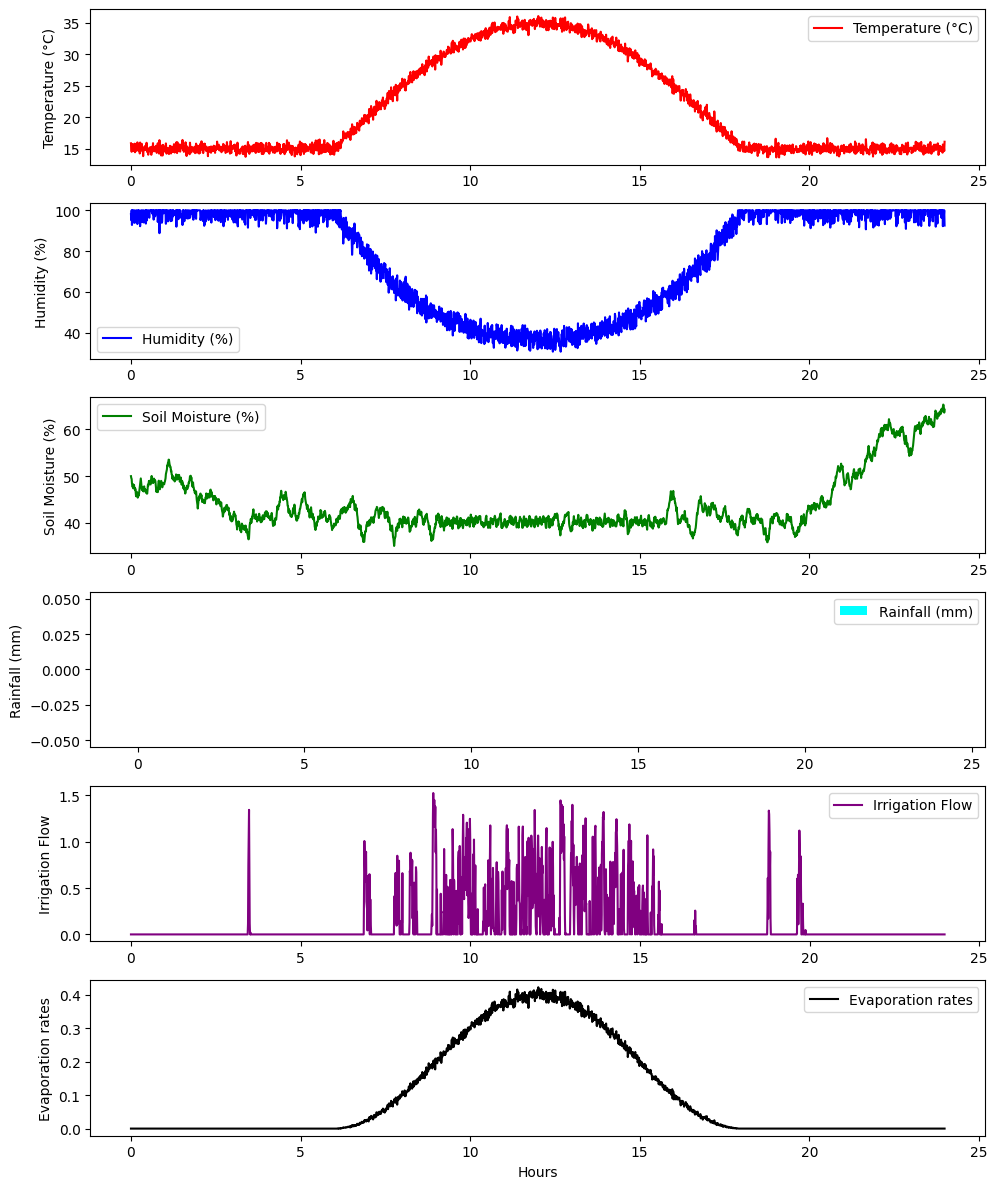

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
hours = np.arange(0, 24, 0.01)  # Simulating for 24 hours

# Solar radiation model (hourly scale) - Supports array input
def solar_radiation(hour, sunrise=6, sunset=18):
    radiation = np.where((sunrise <= hour) & (hour <= sunset),
                         np.sin(np.pi * (hour - sunrise) / (sunset - sunrise)),
                         0)
    return radiation

# Temperature model with daily variation
def temperature_model(hour, T_min=15, T_max=35):
    base_temp = T_min + (T_max - T_min) * solar_radiation(hour)
    noise = np.random.normal(0, 0.5, len(hour))  # Adding sensor noise
    return base_temp + noise

# Humidity model based on temperature and daily cycle
def humidity_model(T):
    H_max = 100  # Max possible humidity (%)
    humidity = H_max * np.exp(-0.05 * (T - 15))
    noise = np.random.uniform(-5, 5, len(T))  # Random fluctuations
    return np.clip(humidity + noise, 20, 100)  # Keep within realistic range

# Rainfall model (event-based, one-time occurrence in a day)
def rainfall_model(hour):
    rain_event_hour = np.random.choice(hours)  # Random hour for rainfall
    rain_amount = np.random.choice([0, 5, 10, 20], p=[0.8, 0.1, 0.07, 0.03])
    return np.where(hours == rain_event_hour, rain_amount, 0)  # Rain at one hour only

# PID Controller for irrigation
def pid_controller(setpoint, measured_value, evap_rate, prev_error, integral, Kp=0.5, Ki=0.1, Kd=0.05, dt=1, alpha=0.7):
    error = setpoint - (measured_value - alpha * evap_rate)  # Adjusting for future evaporation
    integral = max(min(integral + error * dt, 50), -50)  # Limit integral accumulation
    derivative = (error - prev_error) / dt
    output = Kp * error + Ki * integral + Kd * derivative
    return max(0, min(output, 10)), error, integral  # Clamp output between 0 and 10

# Soil moisture model incorporating evaporation, rainfall, and irrigation
def soil_moisture_model(prev_moisture, evap_rate, rainfall, irrigation, beta=0.8):
    noise = np.random.uniform(-1, 1)  # Small sensor variation
    return max(prev_moisture - evap_rate + beta * (irrigation + rainfall) + noise, 10)

# Generate hourly data
T_values = temperature_model(hours)
H_values = humidity_model(T_values)
Rain_values = rainfall_model(hours)

# Soil moisture simulation with PID irrigation control
setpoint_moisture = 40  # Desired soil moisture level
prev_error = 10
integral = 0
soil_moisture = [50]
irrigation_values = []
evaporation_rates = 0.02 * (T_values - 15) * solar_radiation(hours)

for i in range(1, len(hours)):
    irrigation, prev_error, integral = pid_controller(setpoint_moisture, soil_moisture[-1], evaporation_rates[i], prev_error, integral)
    moisture = soil_moisture_model(soil_moisture[-1], evaporation_rates[i], Rain_values[i], irrigation)
    soil_moisture.append(moisture)
    irrigation_values.append(irrigation)

# Plot results
plt.figure(figsize=(10, 12))
plt.subplot(6, 1, 1)
plt.plot(hours, T_values, label='Temperature (°C)', color='red')
plt.ylabel("Temperature (°C)")
plt.legend()

plt.subplot(6, 1, 2)
plt.plot(hours, H_values, label='Humidity (%)', color='blue')
plt.ylabel("Humidity (%)")
plt.legend()

plt.subplot(6, 1, 3)
plt.plot(hours, soil_moisture, label='Soil Moisture (%)', color='green')
plt.ylabel("Soil Moisture (%)")
plt.legend()

plt.subplot(6, 1, 4)
plt.bar(hours, Rain_values, label='Rainfall (mm)', color='cyan', width=0.4)
plt.ylabel("Rainfall (mm)")
plt.legend()

plt.subplot(6, 1, 5)
plt.plot(hours[:-1], irrigation_values, label='Irrigation Flow', color='purple')
plt.ylabel("Irrigation Flow")
plt.legend()

plt.subplot(6, 1, 6)
plt.plot(hours, evaporation_rates, label='Evaporation rates', color='black')
plt.ylabel("Evaporation rates")
plt.xlabel("Hours")
plt.legend()

plt.tight_layout()
plt.show()

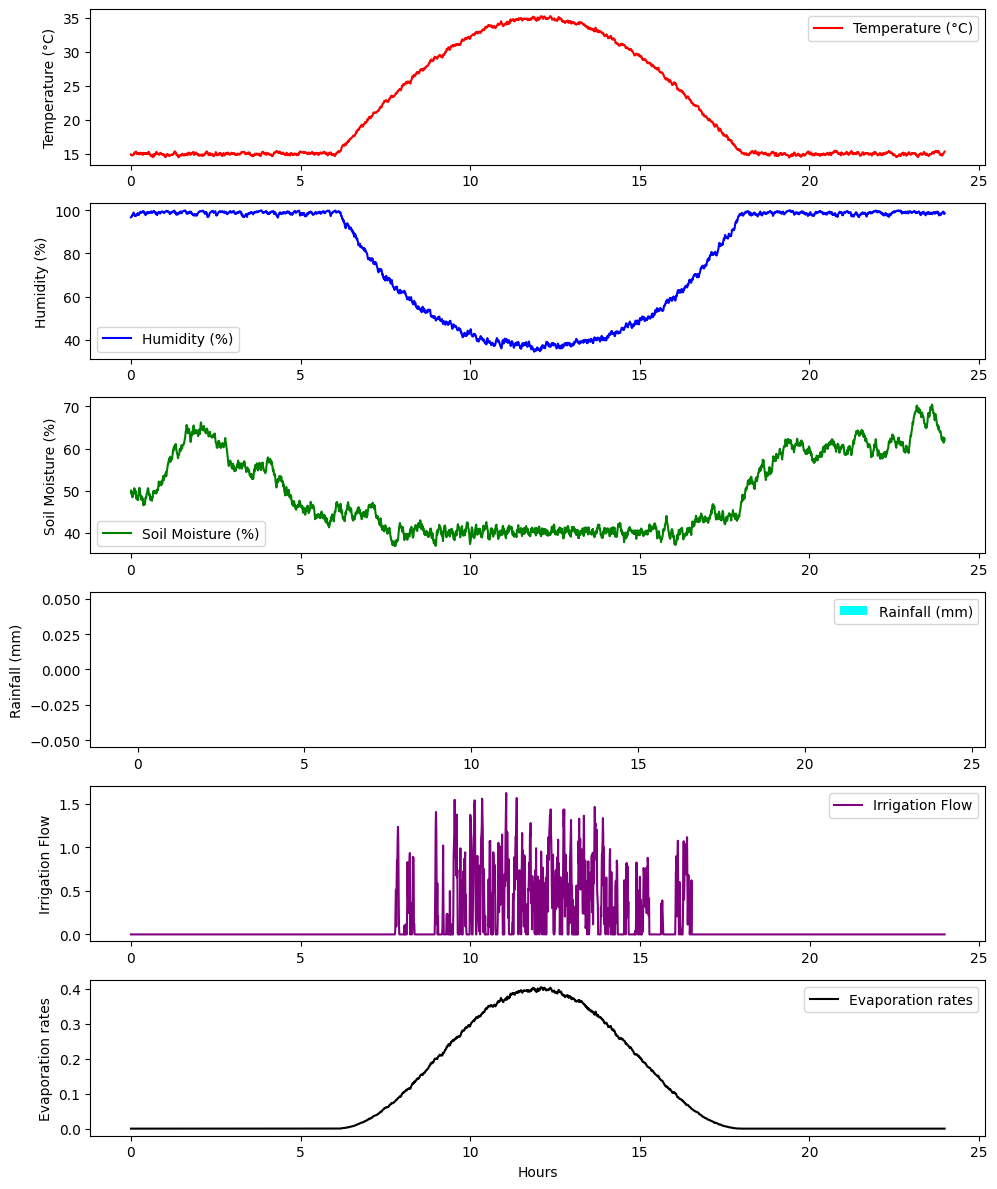

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import threading
import time

# Simulation parameters
hours = np.arange(0, 24, 0.01)  # Simulating for 24 hours

# Low-pass filter for noise reduction
def low_pass_filter(data, alpha=0.2):
    filtered_data = [data[0]]
    for i in range(1, len(data)):
        filtered_data.append(alpha * data[i] + (1 - alpha) * filtered_data[-1])
    return np.array(filtered_data)

# Solar radiation model (hourly scale) - Supports array input
def solar_radiation(hour, sunrise=6, sunset=18):
    radiation = np.where((sunrise <= hour) & (hour <= sunset),
                         np.sin(np.pi * (hour - sunrise) / (sunset - sunrise)),
                         0)
    return radiation

# Temperature model with daily variation
def temperature_model(hour, T_min=15, T_max=35):
    base_temp = T_min + (T_max - T_min) * solar_radiation(hour)
    noise = np.random.normal(0, 0.5, len(hour))  # Adding sensor noise
    return low_pass_filter(base_temp + noise)

# Humidity model based on temperature and daily cycle
def humidity_model(T):
    H_max = 100  # Max possible humidity (%)
    humidity = H_max * np.exp(-0.05 * (T - 15))
    noise = np.random.uniform(-5, 5, len(T))  # Random fluctuations
    return low_pass_filter(np.clip(humidity + noise, 20, 100))

# Rainfall model (event-based, one-time occurrence in a day)
def rainfall_model(hour):
    rain_event_hour = np.random.choice(hours)  # Random hour for rainfall
    rain_amount = np.random.choice([0, 5, 10, 20], p=[0.8, 0.1, 0.07, 0.03])
    return np.where(hours == rain_event_hour, rain_amount, 0)  # Rain at one hour only

# PID Controller for irrigation
def pid_controller(setpoint, measured_value, evap_rate, prev_error, integral, Kp=0.5, Ki=0.1, Kd=0.05, dt=1, alpha=0.7):
    error = setpoint - (measured_value - alpha * evap_rate)  # Adjusting for future evaporation
    integral = max(min(integral + error * dt, 50), -50)  # Limit integral accumulation
    derivative = (error - prev_error) / dt
    output = Kp * error + Ki * integral + Kd * derivative
    return max(0, min(output, 10)), error, integral  # Clamp output between 0 and 10

# Soil moisture model incorporating evaporation, rainfall, and irrigation
def soil_moisture_model(prev_moisture, evap_rate, rainfall, irrigation, beta=0.8):
    noise = np.random.uniform(-1, 1)  # Small sensor variation
    return max(prev_moisture - evap_rate + beta * (irrigation + rainfall) + noise, 10)

# Sensor polling thread
def sensor_polling():
    global T_values, H_values, Rain_values
    while True:
        T_values = temperature_model(hours)
        H_values = humidity_model(T_values)
        Rain_values = rainfall_model(hours)
        time.sleep(1)  # Mimic real-time sensor update every second

# Start sensor polling in a separate thread
sensor_thread = threading.Thread(target=sensor_polling, daemon=True)
sensor_thread.start()

# Generate initial sensor data
T_values = temperature_model(hours)
H_values = humidity_model(T_values)
Rain_values = rainfall_model(hours)

# Soil moisture simulation with PID irrigation control
setpoint_moisture = 40  # Desired soil moisture level
prev_error = 10
integral = 0
soil_moisture = [50]
irrigation_values = []
evaporation_rates = 0.02 * (T_values - 15) * solar_radiation(hours)

for i in range(1, len(hours)):
    irrigation, prev_error, integral = pid_controller(setpoint_moisture, soil_moisture[-1], evaporation_rates[i], prev_error, integral)
    moisture = soil_moisture_model(soil_moisture[-1], evaporation_rates[i], Rain_values[i], irrigation)
    soil_moisture.append(moisture)
    irrigation_values.append(irrigation)

# Plot results
plt.figure(figsize=(10, 12))
plt.subplot(6, 1, 1)
plt.plot(hours, T_values, label='Temperature (°C)', color='red')
plt.ylabel("Temperature (°C)")
plt.legend()

plt.subplot(6, 1, 2)
plt.plot(hours, H_values, label='Humidity (%)', color='blue')
plt.ylabel("Humidity (%)")
plt.legend()

plt.subplot(6, 1, 3)
plt.plot(hours, soil_moisture, label='Soil Moisture (%)', color='green')
plt.ylabel("Soil Moisture (%)")
plt.legend()

plt.subplot(6, 1, 4)
plt.bar(hours, Rain_values, label='Rainfall (mm)', color='cyan', width=0.4)
plt.ylabel("Rainfall (mm)")
plt.legend()

plt.subplot(6, 1, 5)
plt.plot(hours[:-1], irrigation_values, label='Irrigation Flow', color='purple')
plt.ylabel("Irrigation Flow")
plt.legend()

plt.subplot(6, 1, 6)
plt.plot(hours, evaporation_rates, label='Evaporation rates', color='black')
plt.ylabel("Evaporation rates")
plt.xlabel("Hours")
plt.legend()

plt.tight_layout()
plt.show()
